In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/91832/Desktop/googleapps/googleplaystore.csv")

In [3]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
def convert(x):
    k=x[:len(x)-1]
    if len(k)==2:
        return str("0.0"+k)
    elif len(k)==3:
        return str("0."+k)
    elif len(k)==4:
        return str(k[0]+"."+k[1])

In [5]:
df["Size"]=df["Size"].apply(lambda x:x.replace("M","") if "M" in x else x)
df["Size"]=df["Size"].apply(lambda x:x.replace("Varies with device","NaN") if "Varies with device" in x else x)
df["Size"]=df["Size"].apply(lambda x:x.replace(x,convert(x)) if "k" in x else x)
df["Price"]=df["Price"].apply(lambda x:x.replace("$","") if "$" in x else x)
df["Installs"]=df["Installs"].apply(lambda x:x.replace("+","") if "+" in x else x)
df["Installs"]=df["Installs"].apply(lambda x:x.replace(",","") if "," in x else x)
df.rename(columns={"Size":"Size_in_MB"},inplace=True)
df['Size_in_MB'] = pd.to_numeric(df['Size_in_MB'],errors='coerce')

In [6]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size_in_MB        float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

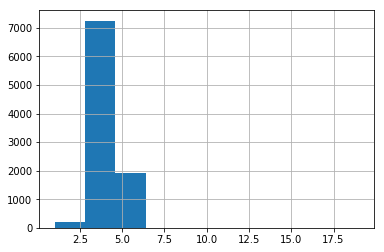

In [7]:
df.Rating.hist()

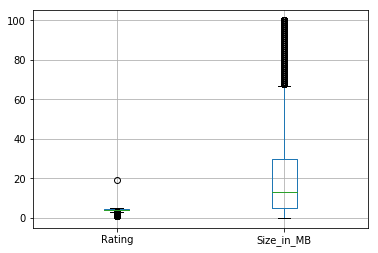

In [8]:
df.boxplot()

In [9]:
df[df.Rating > 5]

,App,Category,Rating,Reviews,Size_in_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,NaN,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
df.drop([10472],inplace=True)

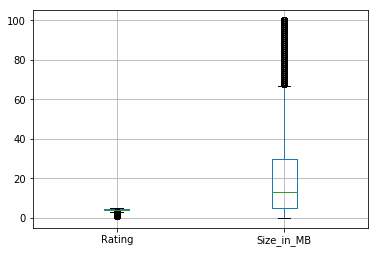

In [11]:
df.boxplot()

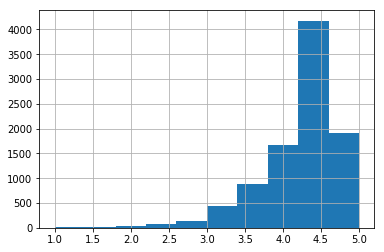

In [12]:
df.Rating.hist()

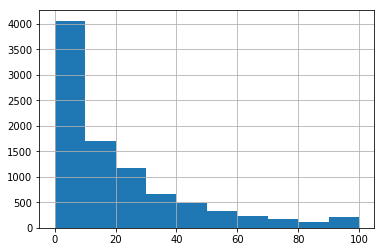

In [13]:
df.Size_in_MB.hist()

In [14]:
def filling_missing_median(values):
    return values.fillna(values.median())

In [15]:
df["Size_in_MB"]=df["Size_in_MB"].transform(filling_missing_median)
df["Rating"]=df["Rating"].transform(filling_missing_median)

In [16]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size_in_MB        0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [17]:
df["Type"].fillna(str(df["Type"].mode().values[0]),inplace=True)
df["Current Ver"].fillna(str(df["Current Ver"].mode().values[0]),inplace=True)
df["Android Ver"].fillna(str(df["Android Ver"].mode().values[0]),inplace=True)

In [18]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size_in_MB        0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [19]:
df.head()

,App,Category,Rating,Reviews,Size_in_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
df["Reviews"]=pd.to_numeric(df["Reviews"],errors="coerce")
df["Price"]=df["Price"].astype(float)
df["Installs"]=df["Installs"].astype(int)

In [21]:
##DEFINING THE MAXIMUM SIZE OF THE APPLICATION
df.Size_in_MB.max()

100.0

In [22]:
##RESULTING THE APPLICATIONS HAVING THE HEIGHEST SIZE
df[df.Size_in_MB>99]

,App,Category,Rating,Reviews,Size_in_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1080,Post Bank,FINANCE,4.5,60449,100.0,1000000,Free,0.00,Everyone,Finance,"July 23, 2018",2.9.12,4.0 and up
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100.0,10000000,Free,0.00,Everyone,Lifestyle;Pretend Play,"July 16, 2018",9.0,4.0 and up
1758,Hungry Shark Evolution,GAME,4.5,6074334,100.0,100000000,Free,0.00,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100.0,5000000,Free,0.00,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up
1988,Hungry Shark Evolution,GAME,4.5,6074627,100.0,100000000,Free,0.00,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
2299,Navi Radiography Pro,MEDICAL,4.7,11,100.0,500,Paid,15.99,Everyone,Medical,"January 14, 2018",1.2.0,4.0.3 and up
3973,Hungry Shark Evolution,GAME,4.5,6071542,100.0,100000000,Free,0.00,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100.0,5000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",2.0.0.11,5.0 and up
5427,Ultimate Tennis,SPORTS,4.3,183004,100.0,10000000,Free,0.00,Everyone,Sports,"July 19, 2018",2.29.3118,4.0.3 and up
5530,The Walking Dead: Our World,GAME,4.0,22435,100.0,1000000,Free,0.00,Teen,Action,"August 1, 2018",1.1.0.3,5.0 and up


In [23]:
#creating groups 
group_create=df.groupby("Category")
x=group_create["Size_in_MB"].agg(np.mean)

Text(0, 0.5, 'AVERAGE SIZE OF THE APPLICATION IN THAT CATEGORY')

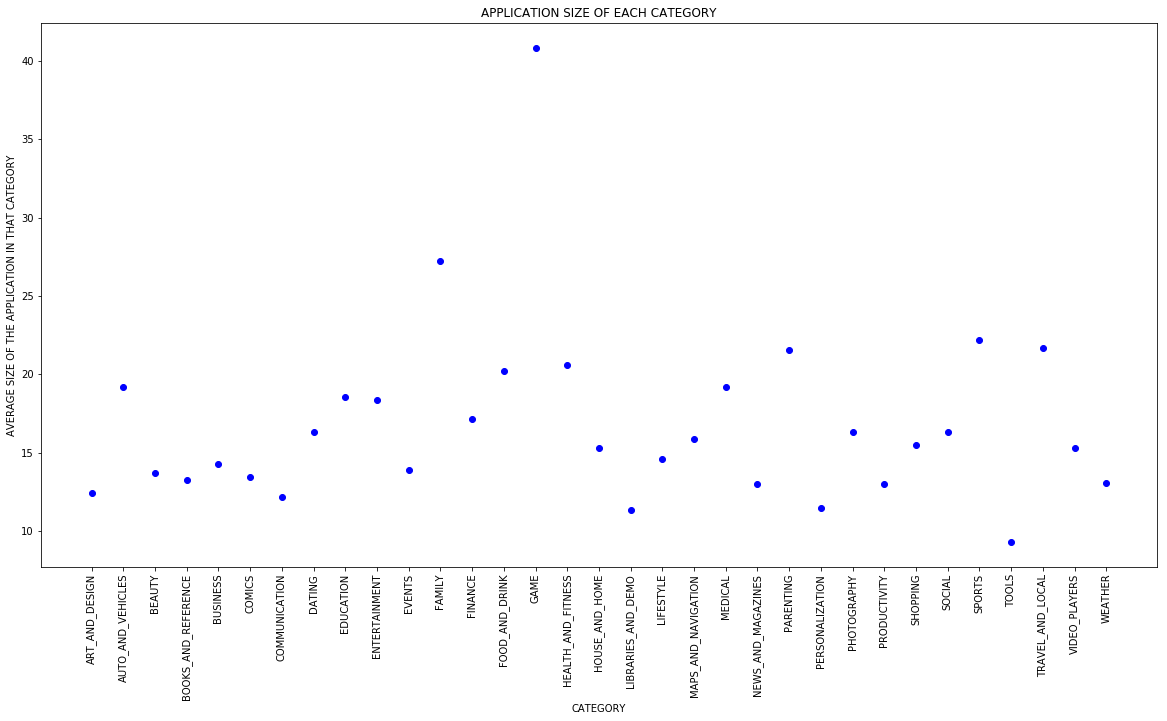

In [24]:
##AVERAGE SIZE OF THE EACH CATEGORY IN APPLICATIONS
plt.figure(figsize=(20,10))
plt.plot(x,"ro",color="b")
plt.xticks(rotation=90)
plt.title("APPLICATION SIZE OF EACH CATEGORY")
plt.xlabel("CATEGORY")
plt.ylabel("AVERAGE SIZE OF THE APPLICATION IN THAT CATEGORY")

In [25]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size_in_MB        float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [27]:
df.to_csv("GooglePlayStoreApps.csv")